In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def invested_capital(time, initial_investment, growth_rate, compounding_frequency=0):
    m=compounding_frequency
    if m > 0:
        return initial_investment * (1 + growth_rate/m)**(m*time)
    else:
        return initial_investment * np.exp(growth_rate * time)

In [2]:
def convert_compounding_non_continuous(initial_compounding, final_compounding, rate):
    """
    Convert the compounding frequency of a rate from initial_compounding to final_compounding.
    """ 

    conversion_factors = {
        'daily': 365,
        'monthly': 12,
        'quarterly': 4,
        'annually': 1
    }
    
    if initial_compounding not in conversion_factors or final_compounding not in conversion_factors:
        raise ValueError("Invalid compounding frequency provided.")
    
    mi = conversion_factors[initial_compounding]
    mf= conversion_factors[final_compounding]

    return mf*((1 + rate / mi) ** (mi / mf) - 1)

In [3]:
def convert_continuity (intial_continuity=True, final_continuity=False,compounding=1, rate=1):
    """
    Convert the compounding frequency of a rate from initial_continuity to final_continuity.
    """

    if intial_continuity  == final_continuity :
        raise ValueError("Invalid continuity type provided.")
    
    if intial_continuity == True and final_continuity == False :
        mf=compounding
        Rf= (np.e ** (rate / mf) - 1) * mf
    elif intial_continuity == False and final_continuity == True:
        mi=compounding
        Rf= np.log(1 + rate / mi) * mi
    else:
        raise ValueError("Invalid continuity type provided.")
    return Rf

In [5]:
R=convert_compounding_non_continuous('monthly', 'annually', 0.05)
print(f"Converted rate: {R:.4f}")

Converted rate: 0.0512


In [6]:
Rf=convert_continuity(intial_continuity=True, final_continuity=False, compounding=12, rate=0.05)
print(f"Converted rate from continuous to non-continuous: {Rf:.4f}")

Converted rate from continuous to non-continuous: 0.0501


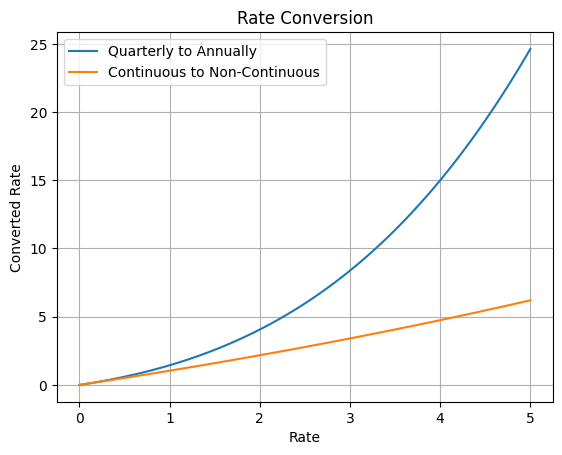

In [14]:
R=np.linspace(0, 5, 100)
plt.plot(R, convert_compounding_non_continuous('quarterly', 'annually', R), label='Quarterly to Annually')
plt.plot(R, convert_continuity(intial_continuity=True, final_continuity=False, compounding=12, rate=R), label='Continuous to Non-Continuous')
plt.xlabel('Rate')
plt.ylabel('Converted Rate')
plt.title('Rate Conversion')    
plt.legend()
plt.grid()
plt.show()